##**★ 다음과 같이 작성해보세요.**
- 다음과 같이 검색하여 파일을 생성합니다. 파일이름은 임의로 설정합니다.
 - 기상자료개발포털 : http://data.kma.go.kr --> '기후통계분석' --> '통계분석' --> '조건별 통계'
 - 지역/지점 : *조별 지정된 지역 선택*
 - 기간 : 일, 2010 ~ 2023
 - 월 : 1 ~ 12, 일 : 1 ~ 31

###**1. 데이터 불러오기**

In [251]:
import pandas as pd
# temp = pd.read_csv('../0626/data/new_extremum_20240626150309.csv', header=7, encoding='euc-kr')
temp = pd.read_csv('../0626/data/new_extremum_20240626150309.csv')
temp.head()
temp.columns

Index(['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최고기온시각', '최저기온(℃)',
       '최저기온시각일교차', '일교차'],
      dtype='object')

###**2. 데이터 셋 재조정**
 - 지점번호, 지점명을 제외한 데이터만 가져오기<br>
   - 변수명 = 변수명.loc[행레이블,열레이블]
 - 열이름 변경
    - 변수명.columns=['열이름', '열이름', ....]

In [252]:
# 지점번호, 지점명을 제외한 데이터만 data 변수로 저장
# 데이터프레임 변수 data의 열번호 변경 ==> '일시','평균기온','최고기온','최고기온시각','최저기온','최조기온시각','일교차'

# 삭제한걸로 했음. data = temp.drop(['지점번호', '지점명'], axis=1)
# rename 도 가능 
data = temp.loc[:,'일시':]
data.columns=['일시','평균기온','최고기온','최고기온시각','최저기온','최저기온시각','일교차']
data.head()

,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차
0,2010-01-01,-7.6,-3.6,15:01,-12.7,6:54,9.1
1,2010-01-02,-3.6,0.2,15:24,-7.4,23:59,7.6
2,2010-01-03,-6.8,-3.2,14:38,-10.5,7:48,7.3
3,2010-01-04,-5.9,-3.4,14:25,-8.0,24:00:00,4.6
4,2010-01-05,-9.9,-7.0,15:06,-12.3,23:33,5.3


###**3. 결측값 확인**
- 결측값 개수 확인 : 변수명.isnull().sum()
- 결측값 데이터 확인 : 변수명[변수명['컬럼명'].isnull( )]

In [253]:
# 결측값 개수 확인
data.isnull().sum()


일시        0
평균기온      0
최고기온      1
최고기온시각    1
최저기온      1
최저기온시각    1
일교차       2
dtype: int64

In [254]:
# 결측값 데이터 확인
data[data['일교차'].isnull()]

,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차
2841,2017-10-12,11.4,NaN,NaN,8.8,23:51,NaN
4602,2022-08-08,26.8,28.4,0:01,NaN,NaN,NaN


###**4. 결측값 행/열 삭제**
- 결측값이 들어있는 행 전체 삭제하기 : 변수명.dropna(axis=0)
- 결측값이 들어있는 열 전체 삭제하기 : 변수명.dropna(axis=1)


In [255]:
# 결측값 행 전체 삭제

data.dropna(axis=0, inplace=True)
data.isnull().sum()


일시        0
평균기온      0
최고기온      0
최고기온시각    0
최저기온      0
최저기온시각    0
일교차       0
dtype: int64

In [256]:
# 기본 정보 확인
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5111 entries, 0 to 5112
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      5111 non-null   object 
 1   평균기온    5111 non-null   float64
 2   최고기온    5111 non-null   float64
 3   최고기온시각  5111 non-null   object 
 4   최저기온    5111 non-null   float64
 5   최저기온시각  5111 non-null   object 
 6   일교차     5111 non-null   float64
dtypes: float64(4), object(3)
memory usage: 319.4+ KB


###**5-1. 최고기온과 해당 날짜 출력**
- ⓐ 최고기온 계산 : '최고기온' 컬럼에서 최대값 계산(max() 함수)
 - hint : 변수명['컬럼명'].max( )
- '최고기온' 컬럼에서 'ⓐ 계산된 최고기온'과 같은 데이터 검색
 - hint : 변수명[변수명['컬럼명'] == 비교값] [ ['컬럼명1', '컬럼명2', ....] ]
- index 재조정 : 변수명.reset_index( )
- '날짜', '최고온도' 컬럼 출력 : 변수명.loc[행레이블,열레이블]

```
[출력결과]
00 지역에서 최고 기온이 가장 높았던 날은 0000-00-00 로 00.0도 였습니다.
```



In [257]:
data.head()
data.columns


Index(['일시', '평균기온', '최고기온', '최고기온시각', '최저기온', '최저기온시각', '일교차'], dtype='object')

In [258]:
# data.loc[data['최고기온'] == max_temp,['일시', '최고기온']].reset_index(drop=True) 
data.loc[data['최고기온'] == data['최고기온'].max(), ['일시', '평균기온', '최고기온', '최저기온', '일교차']]



,일시,평균기온,최고기온,최저기온,일교차
3134,2018-08-01,33.6,39.6,27.8,11.8


In [259]:
data.loc[(data['최고기온'] == data['최고기온'].max()), ['일시', '평균기온', '최고기온', '최저기온', '일교차']].reset_index(drop=True) 
#data.loc[(data['최고기온'] == data['최고기온'].max()), ['일시', '평균기온', '최고기온', '최저기온', '일교차']]


,일시,평균기온,최고기온,최저기온,일교차
0,2018-08-01,33.6,39.6,27.8,11.8


In [260]:
# '최고기온' 컬럼에서 '계산된 최고기온'과 같은 데이터 검색하여 maxData 변수에 저장
# maxData 데이터프레임의 index 초기화
# maxData 데이터프레임에서 '일시'와 '최고기온' 출력 - 변수명.loc[0,열이름]
maxData = data.loc[data['최고기온'] == data['최고기온'].max(), ['일시', '평균기온', '최저기온', '최고기온', '일교차']]
maxData = maxData.reset_index()
# maxData
print('서울의 최고 기온이 가장 높았던 날은', maxData.loc[0, '일시'], '로', maxData.loc[0, '최고기온'],'도 였습니다.' )


서울의 최고 기온이 가장 높았던 날은 2018-08-01 로 39.6 도 였습니다.


###**5-2. 최저기온와 해당 날짜 출력**
- ⓑ 최저기온 계산 : '최저기온' 컬럼에서 최소값 계산(min() 함수)
- '최저기온' 컬럼에서 'ⓑ 계산된 최저기온'과 같은 데이터 검색
- index 재조정 : 변수명.reset_index( )
- '날짜', '최저온도' 컬럼 출력 : 변수명.loc[행레이블,열레이블]

```
[출력결과]
00 지역에서 최저 기온이 가장 낮았던 날은 0000-00-00 로 00.0도 였습니다.
```

In [261]:
# '최저기온' 컬럼에서 '계산된 최저기온'과 같은 데이터 검색하여 minData 변수에 저장
# minData 데이터프레임의 index 초기화
# minData 데이터프레임에서 '일시'와 '최저기온' 출력 - 변수명.loc[0,열이름]

minData = data.loc[data['최저기온'] == data['최저기온'].min(), ['일시', '평균기온', '최저기온', '최고기온', '일교차']]
minData = minData.reset_index()
# maxData
print('서울의 최고 기온이 가장 낮았던 날은', minData.loc[0, '일시'], '로', minData.loc[0, '최저기온'],'도 였습니다.' )


서울의 최고 기온이 가장 낮았던 날은 2021-01-08 로 -18.6 도 였습니다.


###**7. 본인 생일 날짜의 기온 변화 그래프 작성**
- **1단계 : '일시' 열에서 '년'만, '월-일'만 추출하여 새로운 열 생성**
 - 인덱싱 : 변수명['컬럼명'].str[ ]
 - '년도' 열 생성 : '일시' 컬럼의 값에서 앞 4자리까지만 추출 ==> data['년도'] = data['일시'].str[ :4 ]
 - '날짜' 열 생성 : '일시' 컬럼의 값에서 5자리부터 끝까지만 추출 ==> data['날짜'] = data['일시'].str[ 5: ]

- **2단계 : 생성된 '날짜'열 값에서 본인 생일과 동일한 날짜 검색**
- **3단계 :'년도(2010 ~ 2023)'별로 '최고기온'과 '최저기온' 변화 꺽은선 그래프 작성**
  - 차트 크기 : plt.figure(figsize=(가로, 세로)), 단위:inch
  - 차트 제목 : plt.title("제목")
  - 차트 범례 : plt.legend( )
  - 차트 보여주기 : plt.show( )

In [262]:
# 한글 폰트 설치
!pip install koreanize-matplotlib
import koreanize_matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'distutils'

In [ ]:
# 1단계 : '일시' 열에서 새로운 열 '년도'과 '날짜'열 생성
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5111 entries, 0 to 5112
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   (일시,)      5111 non-null   object 
 1   (평균기온,)    5111 non-null   float64
 2   (최고기온,)    5111 non-null   float64
 3   (최고기온시각,)  5111 non-null   object 
 4   (최저기온,)    5111 non-null   float64
 5   (최저기온시각,)  5111 non-null   object 
 6   (일교차,)     5111 non-null   float64
dtypes: float64(4), object(3)
memory usage: 448.5+ KB


,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차
0,2010-01-01,-7.6,-3.6,15:01,-12.7,6:54,9.1
1,2010-01-02,-3.6,0.2,15:24,-7.4,23:59,7.6
2,2010-01-03,-6.8,-3.2,14:38,-10.5,7:48,7.3
3,2010-01-04,-5.9,-3.4,14:25,-8.0,24:00:00,4.6
4,2010-01-05,-9.9,-7.0,15:06,-12.3,23:33,5.3


In [265]:
# 1단계 : '일시' 열에서 새로운 열 년도과 날짜 열 생성
data['년도'] = data['일시'].str[:4]
data['날짜'] = data['일시'].str[5:]
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5111 entries, 0 to 5112
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      5111 non-null   object 
 1   평균기온    5111 non-null   float64
 2   최고기온    5111 non-null   float64
 3   최고기온시각  5111 non-null   object 
 4   최저기온    5111 non-null   float64
 5   최저기온시각  5111 non-null   object 
 6   일교차     5111 non-null   float64
 7   년도      5111 non-null   object 
 8   날짜      5111 non-null   object 
dtypes: float64(4), object(5)
memory usage: 399.3+ KB


In [ ]:
data.년도.dtype

dtype('O')

In [ ]:
# 년도 열을 정수형으로 변환
data['년도'] = data['년도'].astype('int32')


In [ ]:
# 년도별로 평균기온의 평균 계산
# 년도별로 그룹시키기 평균기온의 평균을 구하기
data.groupby('년도')['평균기온'].mean()

년도
2010    12.140822
2011    12.082192
2012    12.268579
2013    12.563562
2014    13.400274
2015    13.621918
2016    13.592896
2017    13.077747
2018    13.002466
2019    13.598904
2020    13.271858
2021    13.752055
2022    13.259066
2023    14.109041
Name: 평균기온, dtype: float64

In [264]:
data.columns

Index(['일시', '평균기온', '최고기온', '최고기온시각', '최저기온', '최저기온시각', '일교차'], dtype='object')

In [269]:
# 2단계 : 생성된 '날짜'열 값에서 본인 생일과 동일한 날짜 검색하여 birthData 변수에 저장
# 예: data[data['날짜']=='10-01']
# data.loc[data['날짜'] == '01-17']
birthdata = data.loc[data['날짜'] == '01-17']
birthdata


,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차,년도,날짜
16,2010-01-17,-4.0,1.4,14:21,-9.0,7:43,10.4,2010,01-17
381,2011-01-17,-9.7,-4.8,15:56,-14.1,4:02,9.3,2011,01-17
746,2012-01-17,2.8,8.2,13:53,0.0,6:06,8.2,2012,01-17
1112,2013-01-17,-5.8,-2.5,15:08,-8.2,7:16,5.7,2013,01-17
1477,2014-01-17,-0.1,3.8,14:46,-3.7,8:24,7.5,2014,01-17
1842,2015-01-17,-4.1,0.0,15:56,-7.7,7:50,7.7,2015,01-17
2207,2016-01-17,1.7,5.4,15:13,-0.7,5:14,6.1,2016,01-17
2573,2017-01-17,-2.0,3.4,15:19,-7.1,7:36,10.5,2017,01-17
2938,2018-01-17,4.5,8.7,12:17,2.4,7:03,6.3,2018,01-17
3303,2019-01-17,-0.3,4.0,15:59,-3.2,7:31,7.2,2019,01-17


In [ ]:

data.groupby('년도')[['평균기온']].mean()

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt

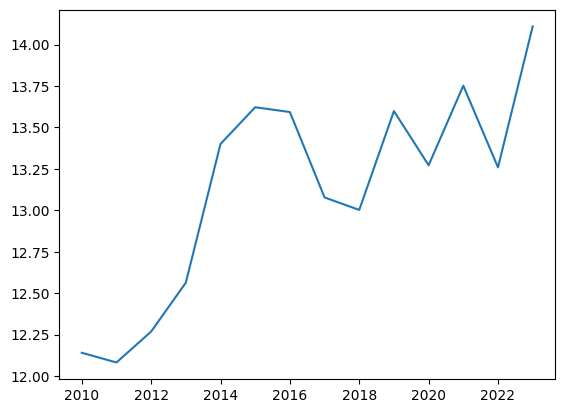

In [270]:
plt.plot(meanData)
plt.show()

In [ ]:
# birthdata = data.loc[data['날짜'] == '01-17']
# 내 생일날 중에 최고기온의 연도는?
rmax = birthdata[birthdata['최고기온']== birthdata['최고기온'].max()]
rmax = rmaxt.reset_index()
rmax


,index,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차,년도,날짜
0,2938,2018-01-17,4.5,8.7,12:17,2.4,7:03,6.3,2018,01-17


In [ ]:
# 내 생일날 중에 최저기온의 연도는?
rmin = birthdata[birthdata['최저기온']== birthdata['최저기온'].min()]
rmin = rmaxt.reset_index()
rmin

,level_0,index,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차,년도,날짜
0,0,2938,2018-01-17,4.5,8.7,12:17,2.4,7:03,6.3,2018,01-17


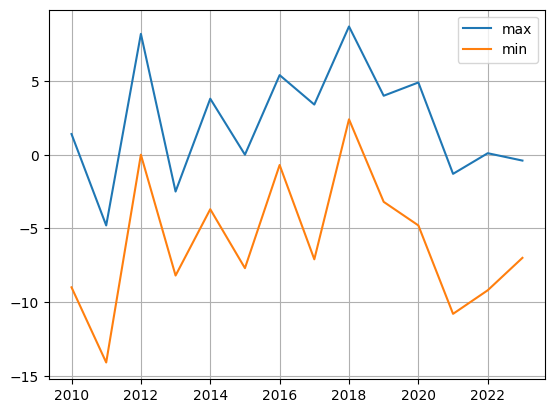

In [ ]:
# 3단계 :'년도(2010 ~ 2023)'별로 '최고기온'과 '최저기온' 꺽은선 그래프 작성, birthData 변수 이용
# 차트 사이즈 : 가로 - 12 inch, 세로 - 10 inch
#년도 x 축 최고기온과 최저기온 Y
plt.plot(birthdata['년도'], birthdata['최고기온'], label='max')
plt.plot(birthdata['년도'], birthdata['최저기온'], label='min')
plt.legend()
plt.grid()
plt.show()
